# Step #1 Load the Data

In [10]:
# A tutorial for this file is available at www.relataly.com
# Tested with Python 3.8.8, Matplotlib 3.5, Scikit-learn 0.24.1, Seaborn 0.11.1, numpy 1.19.5

from cryptocmd import CmcScraper
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
from sklearn import cluster, covariance, manifold

# This list defines the coins that will be considered
symbol_dict = {
    'BTC': 'Bitcoin',
    'ETH': 'Ethereum',
    'XRP': 'Ripple',
    'ADA': 'Cardano',
    'KMD': 'Komodo',
    'BNB': 'Binance Coin',
    'DOGE': 'Doge Coin',
    'LTC': 'Litecoin',
    'USDT': 'Tether',
    'ZRX': 'Zer0',
    'BAT': 'Battoken',
    'UNI': 'DOT',
    'PSG': 'PSG Token',
    'ACM': 'ACM Token',
    'RSR': 'AS Rom Token',
    'JUV': 'Juventus Turin Token',
    'ATM': 'Atletico Madrid Token',
    'ATOM': 'ATOM',
    'LRC': 'Loopring',
    'SOL': 'Solana', 
    'MATIC': 'Polygon', 
    'LINK': 'Link',
    'ETC': 'Ethereum Classic',
    'AVAX': 'Avalance', 
    'DCR': 'Decred',
    'WAVES': 'WAVES',
    'VET': 'Vechain', 
    'ARK': 'ARK',
    'BCH': 'Bitcoin Cash',
    'ICP': 'Internet Computer',
    'DGB': 'Digibyte',
   'BTT': 'BitTorrent',
    'CEL': 'Celsius',
    'SNX': 'Synthetix', 
    'ENJ': 'Enjin',
    'ZIL': 'Zilliqa', 
    'CHZ': 'Chilliz',
    'THETA': 'Theta',
    'XLM': 'Stellar Lumen',
    'SYS': 'Sys Coin',
    'LRC': 'Loopring',
    'RLC': 'LRC',
    'EOS': 'EOS',
    'NEO': 'NEO',
    'MIOTA': 'IOTA',
    'CAKE': 'Cake Defi',
     'BLZ': 'BLZ',
    'XMR': 'Monero',
     'FORTH': 'Ampleforth'
}

# Download historic crypto prices via CmcScraper
def load_fresh_data_and_save_to_disc(symbol_dict, save_path):
    # Initialize Coin Symbols List
    symbols, names = np.array(sorted(symbol_dict.items())).T
    for symbol in symbols:

        # Initialise scraper without time interval
        scraper = CmcScraper(symbol)

        # Pandas dataFrame for the same data
        df_coin_prices = scraper.get_dataframe()
        df = pd.DataFrame()
        print(f'fetching prices for {symbol}')
        df[symbol + '_Open'] = df_coin_prices['Open']
        df[symbol + '_Close'] = df_coin_prices['Close']
        df[symbol + '_Avg'] = (df_coin_prices['Close'] + df_coin_prices['Open']) / 2
        # Daily price fluctuations in percent
        df[symbol + '_p'] = (df_coin_prices['Open'] - df_coin_prices['Close']) / df_coin_prices['Open']
        
        if symbol == symbols[0]:
            # Create a new DataFrame for the first cryptocurrency in the list
            df_crypto = df.copy() 
        else:
            # Merge the new price data with the existing DataFrame
            df_crypto = pd.merge(
                left=df_crypto, right=df, how="outer",
                left_index=True, right_index=True)
        
        # Remove all cryptocurrencies that 
        filter_columns = [s for s in df_crypto.columns if '_p' in s]
        X_df_filtered = df_crypto[filter_columns].copy()
        
    X_df_filtered.to_csv(save_path + 'historical_crypto_prices.csv')
    return names, symbols, X_df_filtered
        

# If set to False the data will only be downloaded when you execute the code
# Set to True, if you want a fresh copy of the data.  
fetch_new_data = True 
save_path = '' # path where the price data will be stored in a csv file

# Fetch fresh data via the scraping package, or use data from the csv file on disk
if fetch_new_data == False:
    try:
        print('loading from disk')
        X_df_filtered = pd.read_csv(save_path + 'historical_crypto_prices.csv')
        if 'Unnamed: 0' in X_df_filtered.columns: 
            X_df_filtered = X_df_filtered.drop(['Unnamed: 0'], axis=1)
            symbols, names = np.array(sorted(symbol_dict.items())).T
        print(list(X_df_filtered.columns))
    except:
        print('no existing price data found - loading fresh data from coinmarketcap and saving them to disk')
        names, symbols, X_df_filtered = load_fresh_data_and_save_to_disc(symbol_dict, save_path)
        print(list(symbols))
else:
       print('loading fresh data from coinmarketcap and saving them to disk')
       names, symbols, X_df_filtered = load_fresh_data_and_save_to_disc(symbol_dict, save_path)
       print(list(symbols))

# Limit the price data to the last t days
t= 50 # in days
X_df_filtered = X_df_filtered[:t]
X_df_filtered.head()

loading fresh data from coinmarketcap and saving them to disk
fetching prices for ACM
fetching prices for ADA
fetching prices for ARK
fetching prices for ATM
fetching prices for ATOM
fetching prices for AVAX
fetching prices for BAT
fetching prices for BCH
fetching prices for BLZ
fetching prices for BNB
fetching prices for BTC
fetching prices for BTT
fetching prices for CAKE
fetching prices for CEL
fetching prices for CHZ
fetching prices for DCR
fetching prices for DGB
fetching prices for DOGE
fetching prices for ENJ
fetching prices for EOS
fetching prices for ETC
fetching prices for ETH
fetching prices for FORTH
fetching prices for ICP
fetching prices for JUV
fetching prices for KMD
fetching prices for LINK
fetching prices for LRC
fetching prices for LTC
fetching prices for MATIC
fetching prices for MIOTA
fetching prices for NEO
fetching prices for PSG
fetching prices for RLC
fetching prices for RSR
fetching prices for SNX
fetching prices for SOL
fetching prices for SYS
fetching prices

,ACM_p,ADA_p,ARK_p,ATM_p,ATOM_p,AVAX_p,BAT_p,BCH_p,BLZ_p,BNB_p,...,THETA_p,UNI_p,USDT_p,VET_p,WAVES_p,XLM_p,XMR_p,XRP_p,ZIL_p,ZRX_p
0,0.031987,-0.037645,-0.005702,0.030928,-0.005897,-0.012404,-0.012262,-0.022529,0.008072,-0.007111,...,-0.021994,-0.023758,-0.000103,-0.021024,-0.015416,-0.004096,-0.022988,-0.027397,-0.016659,-0.012255
1,0.028192,0.065034,0.122306,0.010310,0.093558,0.106811,0.082863,0.075567,0.062105,0.054733,...,0.067264,0.081040,0.000136,0.077203,0.092987,0.078562,0.111519,0.071696,0.076484,0.085094
2,0.040771,0.016097,-0.133345,0.018963,0.011304,-0.033328,-0.007616,0.011458,-0.019993,0.005134,...,-0.005104,-0.024190,0.000077,0.002218,0.008920,0.004139,-0.031822,-0.012107,-0.003906,-0.021170
3,-0.027698,0.005129,-0.031516,-0.002639,0.022235,-0.008117,0.003969,0.019119,0.015403,0.005920,...,0.007992,0.027203,0.000003,0.000701,0.010739,0.005324,-0.007914,0.007168,0.004556,-0.003786
4,-0.021129,-0.019053,0.003273,-0.008121,0.002883,-0.004927,0.002548,-0.000599,0.028492,-0.012181,...,0.000198,-0.025817,-0.000047,-0.002800,-0.051515,-0.004861,0.015134,-0.000596,-0.010343,0.004530


# Step #2 Plotting Stock Charts

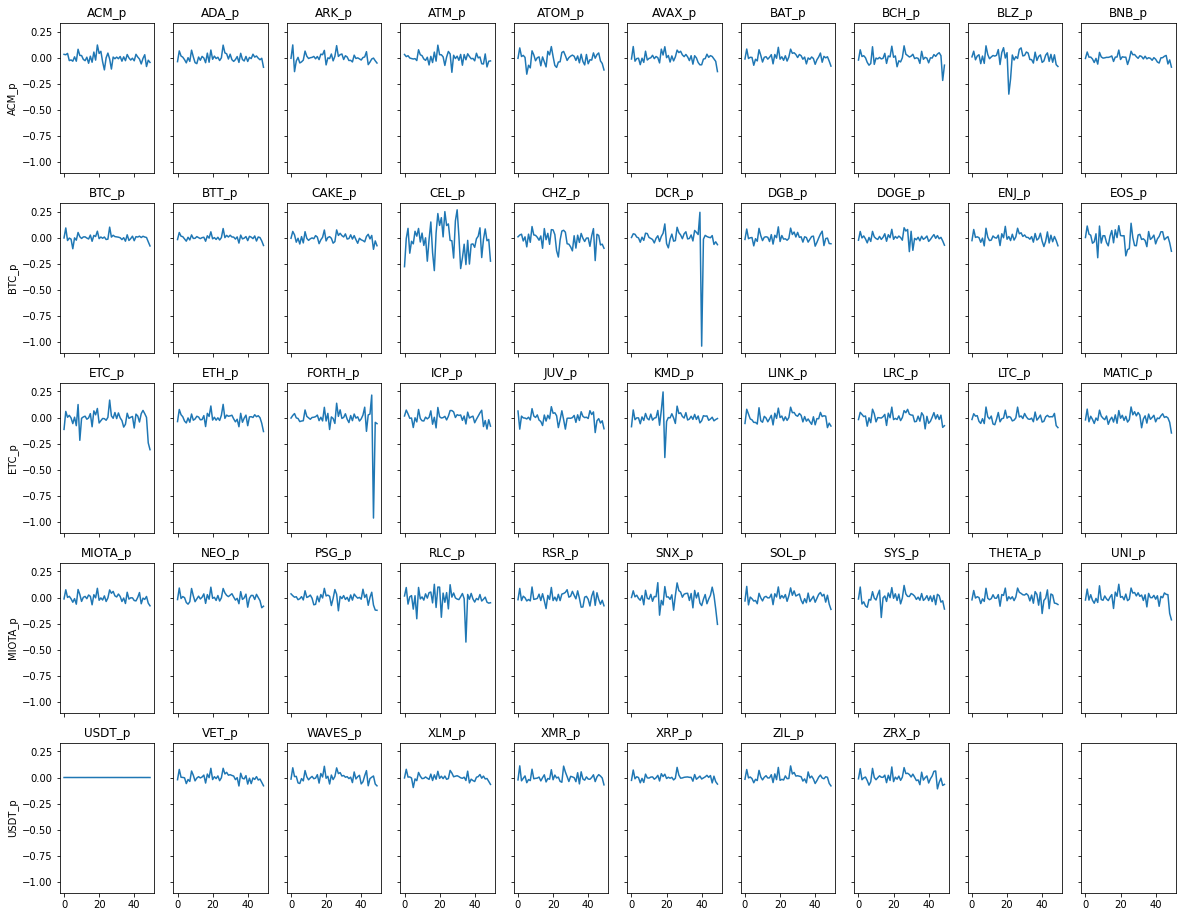

In [11]:
# Create Prices Charts for all Cryptocurrencies
list_length = X_df_filtered.shape[1]
ncols = 10
nrows = int(round(list_length / ncols, 0))
height = list_length/3 if list_length > 30 else 4

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(20, height))
for i, ax in enumerate(fig.axes):
        if i < list_length:
            sns.lineplot(data=X_df_filtered, x=X_df_filtered.index, y=X_df_filtered.iloc[:, i], ax=ax)
            ax.set_title(X_df_filtered.columns[i])
plt.show()

# Step #3 Clustering Cryptocurrencies using Affinity Propagation

In [12]:
# Drop NaN values
X_df = pd.DataFrame(np.array(X_df_filtered)).dropna()

# Transpose the data to structure prices along columns
X = X_df.copy()
X /= X.std(axis=0)
X = np.array(X)

# Define an edge model based on covariance
edge_model = covariance.GraphicalLassoCV()

# Standardize the time series
edge_model.fit(X)

# Group cryptos to clusters using affinity propagation
# The number of clusters will be determined by the algorithm
cluster_centers_indices , labels = cluster.affinity_propagation(edge_model.covariance_, random_state=1)
cluster_dict = {}
n_labels = labels.max()
print(f"{n_labels} Clusters")
for i in range(n_labels + 1):
    clusters = ', '.join(names[labels == i])
    print('Cluster %i: %s' % ((i + 1), clusters))
    cluster_dict[i] = (clusters)

10 Clusters
Cluster 1: ACM Token, Atletico Madrid Token, Juventus Turin Token, PSG Token
Cluster 2: BLZ
Cluster 3: Celsius
Cluster 4: Chilliz
Cluster 5: Decred
Cluster 6: Ampleforth
Cluster 7: Komodo
Cluster 8: ATOM, Binance Coin, Cake Defi, Link, AS Rom Token, Theta
Cluster 9: LRC
Cluster 10: Tether
Cluster 11: Cardano, ARK, Avalance, Battoken, Bitcoin Cash, Bitcoin, BitTorrent, Digibyte, Doge Coin, Enjin, EOS, Ethereum Classic, Ethereum, Internet Computer, Loopring, Litecoin, Polygon, IOTA, NEO, Synthetix, Solana, Sys Coin, DOT, Vechain, WAVES, Stellar Lumen, Monero, Ripple, Zilliqa, Zer0


c:\Users\Flo\anaconda3\envs\tfgpu\lib\site-packages\numpy\core\_methods.py:230: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


# Step #4 Create a 2D Positioning Model based on  he Graph Structure

In [13]:
# Create a node_position_model that find the best position of the cryptos on a 2D plane
# The number of components defines the dimensions in which the nodes will be positioned
node_position_model = manifold.LocallyLinearEmbedding(n_components=2, eigen_solver='dense', n_neighbors=20)
embedding = node_position_model.fit_transform(X.T).T

# The result are x and y coordindates for all cryptocurrencies
pd.DataFrame(embedding)

# Create an edge_model that represents the partial correlations between the nodes
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]

# Only consider partial correlations above a specific threshold (0.02)
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

# Convert the Positioning Model into a DataFrame
data = pd.DataFrame.from_dict({"embedding_x":embedding[0],"embedding_y":embedding[1]})

# Add the labels to the 2D positioning model
data["labels"] = labels
print(data.shape)
data.head()

(48, 3)


,embedding_x,embedding_y,labels
0,0.446892,0.010176,0
1,-0.046273,-0.061174,10
2,-0.041463,0.161923,10
3,0.480403,-0.015922,0
4,-0.056241,0.000943,7


# Step #5 Vizualize the Crypto Market Structure

<AxesSubplot:ylabel='Count'>

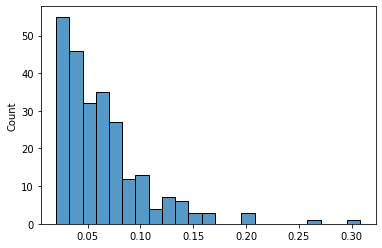

In [14]:
# Create an array with the segments for connecting the data points
start_idx, end_idx = np.where(non_zero) 
segments = [[np.array([embedding[:, start], embedding[:, stop]]).T, start, stop] for start, stop in zip(start_idx, end_idx)]

# Create a normalized representation of partial correlation between crypto currencies. 
# We can later use covariance to vizualize the strength of the connections
pc = np.abs(partial_correlations[non_zero])
normalized = (pc-min(pc))/(max(pc)-min(pc))

# plot the distribution of covariance between the cryptocurrencies
sns.histplot(pc)

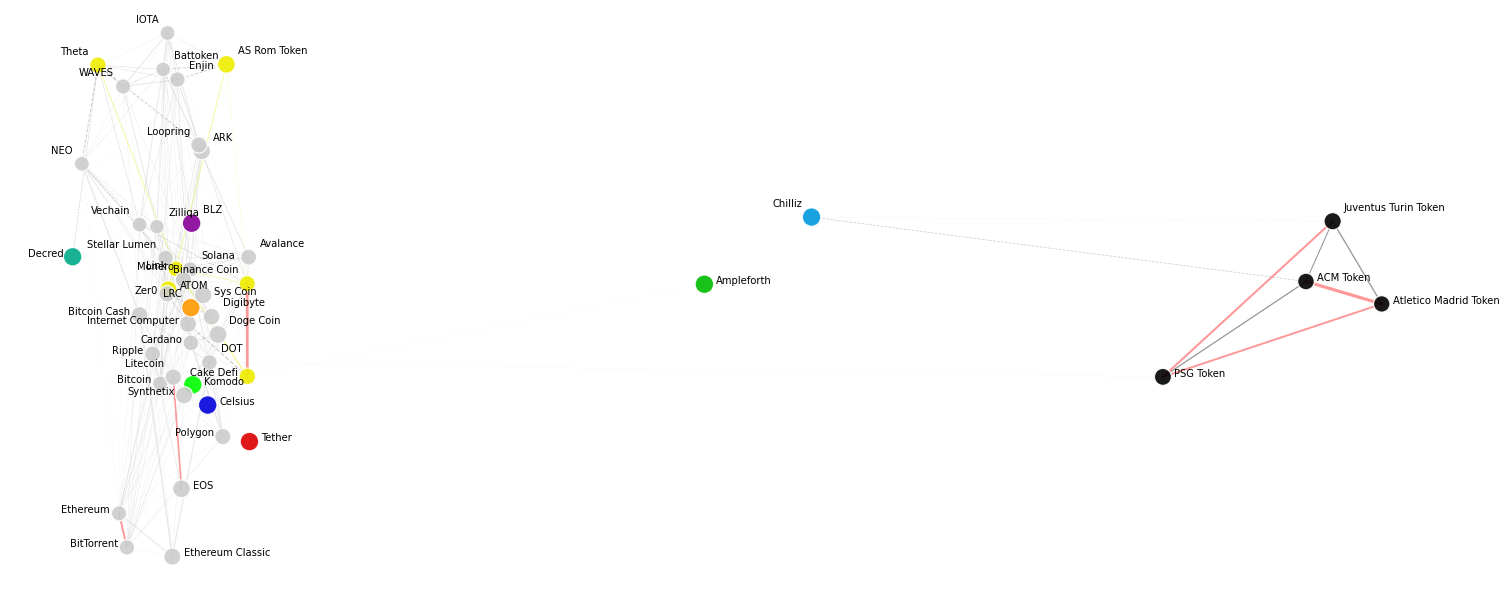

In [15]:
# Visualization
plt.figure(1, facecolor='w', figsize=(20, 8))
plt.clf()
ax = plt.axes([0., 0., 1., 1.])

# Plot the nodes using the coordinates of our embedding
sc = sns.scatterplot(data=data, x="embedding_x", y="embedding_y", zorder=1, s = 350 * d ** 2, c=labels, cmap=plt.cm.nipy_spectral, alpha=.9, palette="muted")

# Plot the covariance edges between the nodes (scatter points)
line_strength = 3.2
    
for index, ((x, y), start, stop) in enumerate(segments):     
    norm_partial_correlation = normalized[index]
    if list(data.iloc[[start]]['labels'])[0] == list(data.iloc[[stop]]['labels'])[0]:
        if norm_partial_correlation > 0.5:
            color = 'red'; linestyle='solid'
        else:
            color = plt.cm.nipy_spectral(list(data.iloc[[start]]['labels'])[0] / float(n_labels)); linestyle='solid'
    else:
        if norm_partial_correlation > 0.5:
            color = 'red'; linestyle='solid'
        else:
            color = 'grey'; linestyle='dashed'
    plt.plot(x, y, alpha=.4, zorder=0, linewidth=normalized[index]*line_strength, color=color, linestyle=linestyle)
    

# Labels the nodes and position the labels to avoid overlap with other labels
for index, (name, label, (x, y)) in enumerate(zip(names, labels, embedding.T)):
    dx = x - embedding[0]
    dy = y - embedding[1]
    dy[index], dx[index] = 1, 1
    this_dx = dx[np.argmin(np.abs(dy))]
    this_dy = dy[np.argmin(np.abs(dx))]
    if this_dx > 0:
        horizontalalignment = 'left'
        x = x + .005
    else:
        horizontalalignment = 'right'
        x = x - .004
        
    if this_dy > 0:
        verticalalignment = 'bottom'
        y = y + .01
    else:
        verticalalignment = 'top'
        y = y + .01
        
    
    plt.text(x, y, name, size=10,
             horizontalalignment=horizontalalignment,
             verticalalignment=verticalalignment)
    
    # Label customization options 
    # color = plt.cm.nipy_spectral(label / float(n_labels))
    # bbox=dict(facecolor=plt.cm.nipy_spectral(label / float(n_labels)), edgecolor="w", alpha=.2)
    
plt.axis('off')
plt.show()

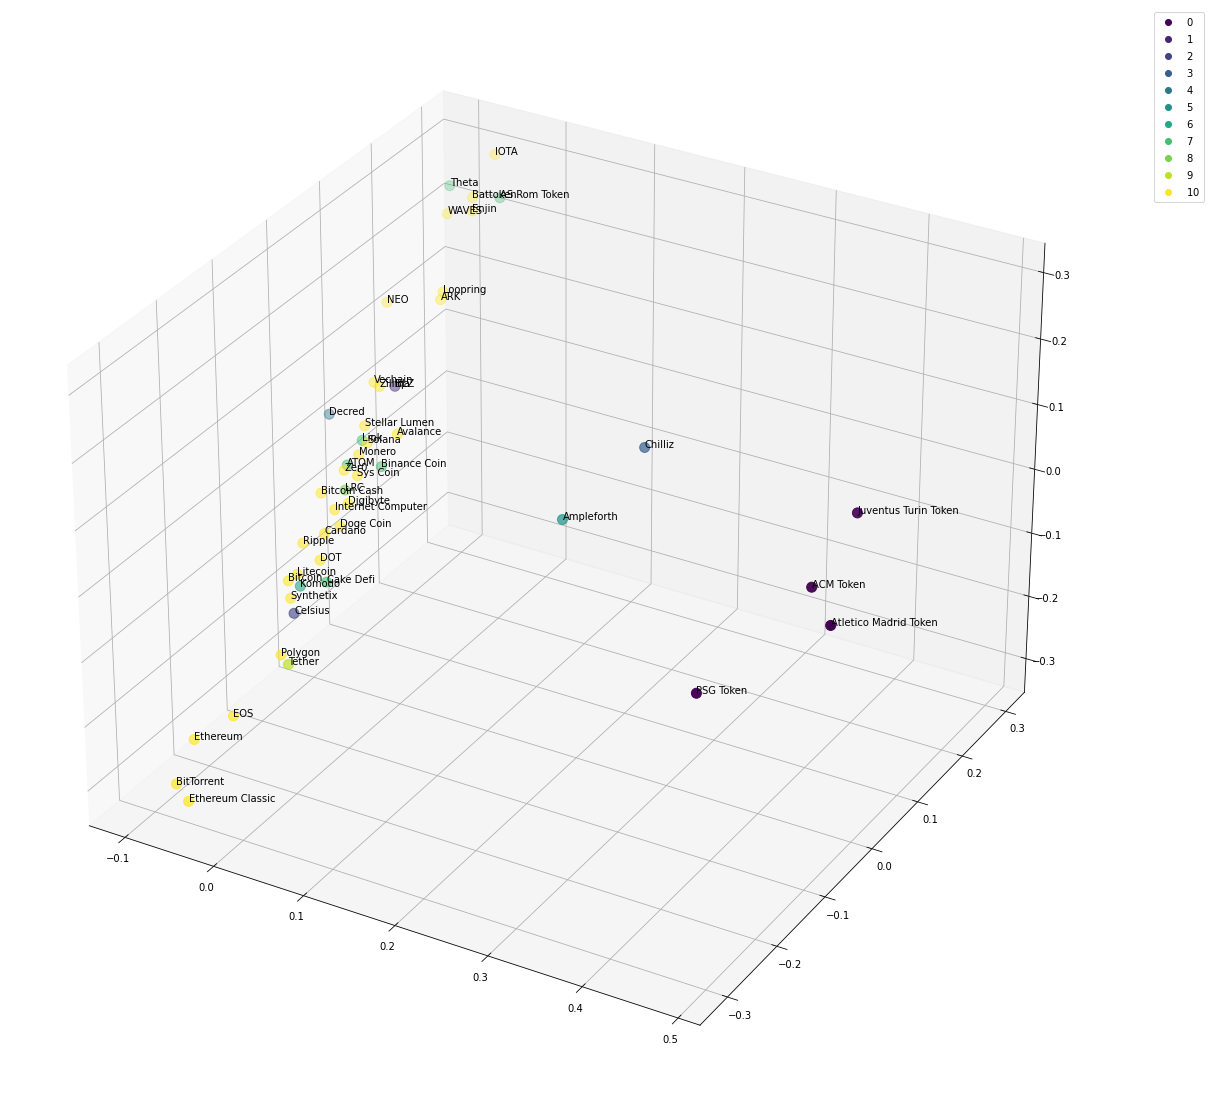

In [16]:
# Find the best position of the cryptos on a 3D plane
node_position_model = manifold.LocallyLinearEmbedding(n_components=3, eigen_solver='dense', n_neighbors=20)
embedding = node_position_model.fit_transform(X.T).T

# The result are x and y coordindates for all cryptocurrencies
pd.DataFrame(embedding)

# Display a graph of the partial correlations
partial_correlations = edge_model.precision_.copy()
d = 1 / np.sqrt(np.diag(partial_correlations))
partial_correlations *= d
partial_correlations *= d[:, np.newaxis]
non_zero = (np.abs(np.triu(partial_correlations, k=1)) > 0.02)

data = pd.DataFrame.from_dict({"embedding_x":embedding[0],"embedding_y":embedding[1],"embedding_z":embedding[1]})
data["labels"] = labels
data["names"] = names

import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection='3d')

xs = data["embedding_x"]
ys = data["embedding_y"]
zs = data["embedding_z"]
sc = ax.scatter(xs, ys, zs, c=labels, s=100)
    
for i in range(len(data)):
    x = xs[i]
    y = ys[i]
    z = zs[i]
    label = data["names"][i]
    ax.text(x, y, z, label)
    
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.show()